Задача: распределить новые точки продаж по имеющимся сегментам (классификация).

In [112]:
# https://tproger.ru/translations/scikit-learn-in-python/

# обработка
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

# визуализация
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

# моделирование
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from lightgbm import LGBMClassifier

In [113]:
df_old = pd.read_excel('D:\\Work\\data\\telecom\\filials_old.xlsx') # старые точки продаж
df_new = pd.read_excel('D:\\Work\\data\\telecom\\filials_new.xlsx') # новые точки продаж, подлежащие классификации

df_old.head(10)

,Регион,Филиал,Категории доступных продуктов,База клиентов,Активные клиенты в текущем месяце,Активные клиенты за 3 месяца,Новые клиенты,Пользователи трафика данных,Пользователи голосовых услуг,Выручка,Новая выручка,Трафик данные,Трафик минут,Выручка на абонента,Стоимость минуты,Стоимость мегабайта,Сегмент
0,PoО,1,6,0,0,0,0,5,6,5577.90,0.00,28908.00,6077.20,0.00,0.00,0.00,1
1,АмО,1,1,1715,472,451,0,306,85,22586.05,0.00,3705.49,23284.82,3529.87,646.00,806.51,1
2,АмО,1,2,351,286,306,1,156,243,181412.09,43.75,846382.89,128961.85,11523.80,5533.23,23615.56,1
3,АмО,1,3,501,224,232,2,166,9,90806.10,729.47,433112.76,215.97,4816.10,12.47,25283.65,1
4,АмО,1,4,3669,2022,2209,50,355,1729,318288.66,0.00,264564.63,598514.08,9842.36,7477.43,12043.12,1
5,АмО,1,5,720,617,675,0,454,584,407882.24,0.00,1384128.63,420528.08,9460.49,6181.75,22842.69,1
6,АмО,1,6,159,114,136,0,81,122,45856.05,0.00,532833.88,51182.78,11395.77,10224.48,79526.96,1
7,АмО,1,7,46,35,46,0,30,34,28669.49,0.00,244422.86,17379.87,4571.24,3730.08,65163.38,1
8,АмО,1,8,4,4,4,0,4,4,2140.20,0.00,65741.16,1577.28,2140.20,1577.28,65741.15,1
9,АмО,1,1,6939,4615,4764,214,971,1335,180285.17,4293.31,101510.20,45101.28,8886.13,714.57,16011.49,1


In [114]:
# сводные данные по имеющейся классификации

df_old.describe().T

,count,mean,std,min,25%,50%,75%,max
Филиал,2999.00,4.48,2.30,1.00,2.00,5.00,6.00,8.00
Категории доступных продуктов,2999.00,4.20,2.20,1.00,2.00,4.00,6.00,8.00
База клиентов,2999.00,3908.04,30932.26,0.00,46.00,422.00,2068.50,1204477.00
Активные клиенты в текущем месяце,2999.00,2444.35,15809.39,0.00,32.00,298.00,1483.50,655455.00
Активные клиенты за 3 месяца,2999.00,2522.06,16068.98,0.00,38.00,333.00,1589.00,653175.00
Новые клиенты,2999.00,99.13,1392.36,0.00,0.00,2.00,23.00,53421.00
Пользователи трафика данных,2999.00,1391.93,10399.20,0.00,16.00,126.00,616.50,381943.00
Пользователи голосовых услуг,2999.00,1178.11,4942.24,0.00,8.00,95.00,757.00,147172.00
Выручка,2999.00,631687.64,3908962.88,-172096.93,11483.40,78328.98,336095.93,120339677.64
Новая выручка,2999.00,8866.87,48685.78,-36762.05,0.00,107.56,2619.60,1346331.13


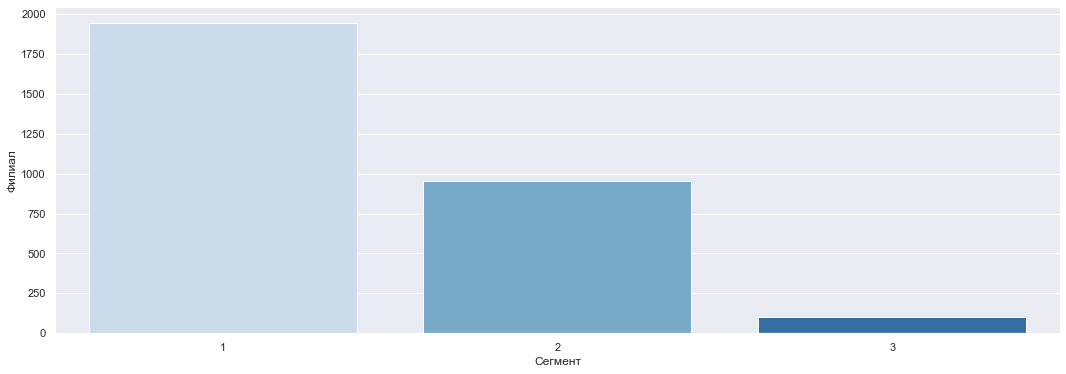

In [115]:
# баланс классов графиком

df_seg = df_old[['Филиал', 'Сегмент']].groupby(['Сегмент'])['Филиал'].count().to_frame()
plt.figure(figsize=(18, 6))
sns.barplot(x=df_seg.index, y='Филиал', data=df_seg, palette='Blues')

Частичный дисбаланс: классы представлены не равномерно.

In [116]:
# и в регионах разное количество сегментов

df_old[['Регион', 'Сегмент']].groupby(['Регион'])['Сегмент'].nunique().to_frame()[:10]

,Сегмент
Регион,
PoО,1
АбО,2
АдО,3
АмО,3
АрО,2
АсО,2
БаО,2
БеО,3
БрО,2


In [117]:
# и очень разное количество точек

df_old[['Регион', 'Сегмент']].groupby(['Регион'])['Сегмент'].count().to_frame()[:10]

,Сегмент
Регион,
PoО,8
АбО,35
АдО,29
АмО,40
АрО,37
АсО,36
БаО,35
БеО,35
БрО,36


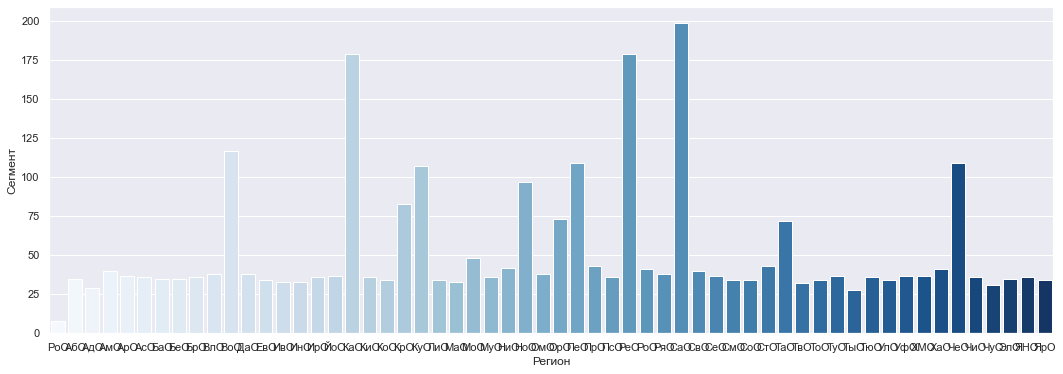

In [118]:
# тоже самое на графике позволяет увидеть, что в некоторых регионах точек особенно много

df_reg = df_old[['Регион', 'Сегмент']].groupby(['Регион'])['Сегмент'].count().to_frame()
plt.figure(figsize=(18, 6))
sns.barplot(x=df_reg.index, y='Сегмент', data=df_reg, palette='Blues')

In [119]:
# стандартизируем все численные переменные через MinMaxScaler

scaler = MinMaxScaler()

def some_scaler(data):
    for i in data.columns[1:16]:
        col = scaler.fit_transform(data[i].values.reshape(-1, 1))
        i_scaled=pd.DataFrame(col, columns=[i]) 
        data[i] = i_scaled

In [120]:
some_scaler(df_old)
df_old

,Регион,Филиал,Категории доступных продуктов,База клиентов,Активные клиенты в текущем месяце,Активные клиенты за 3 месяца,Новые клиенты,Пользователи трафика данных,Пользователи голосовых услуг,Выручка,Новая выручка,Трафик данные,Трафик минут,Выручка на абонента,Стоимость минуты,Стоимость мегабайта,Сегмент
0,PoО,0.00,0.71,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,1
1,АмО,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,1
2,АмО,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.03,0.02,1
3,АмО,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.02,1
4,АмО,0.00,0.43,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.03,0.00,0.01,0.34,0.05,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,ТуО,1.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,2
2995,ТуО,1.00,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.01,0.00,2
2996,ТуО,1.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,2
2997,ТуО,1.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,3


In [121]:
df_old[df_old['Регион'] == 'МоО'].corr()['Сегмент'].sort_values()

Стоимость минуты                    -0.53
Новая выручка                       -0.42
Стоимость мегабайта                 -0.41
Пользователи голосовых услуг        -0.41
Трафик данные                       -0.33
Активные клиенты за 3 месяца        -0.32
Выручка                             -0.31
Активные клиенты в текущем месяце   -0.31
Пользователи трафика данных         -0.31
Трафик минут                        -0.31
База клиентов                       -0.30
Новые клиенты                       -0.21
Филиал                               0.00
Категории доступных продуктов        0.00
Выручка на абонента                  0.07
Сегмент                              1.00
Name: Сегмент, dtype: float64

In [122]:
df_old[df_old['Регион'] == 'ВлО'].corr()['Сегмент'].sort_values()

Выручка на абонента                 -0.47
Стоимость минуты                    -0.47
Активные клиенты за 3 месяца        -0.38
Стоимость мегабайта                 -0.37
Активные клиенты в текущем месяце   -0.37
База клиентов                       -0.36
Пользователи голосовых услуг        -0.34
Пользователи трафика данных         -0.32
Выручка                             -0.29
Трафик минут                        -0.26
Трафик данные                       -0.21
Категории доступных продуктов       -0.11
Новая выручка                       -0.04
Новые клиенты                        0.01
Сегмент                              1.00
Филиал                                nan
Name: Сегмент, dtype: float64

In [123]:
df_old[df_old['Регион'] == 'АмО'].corr()['Сегмент'].sort_values()

Выручка на абонента                 -0.64
Стоимость минуты                    -0.49
Выручка                             -0.43
Пользователи трафика данных         -0.36
База клиентов                       -0.35
Активные клиенты за 3 месяца        -0.34
Активные клиенты в текущем месяце   -0.33
Трафик минут                        -0.33
Пользователи голосовых услуг        -0.32
Стоимость мегабайта                 -0.25
Новая выручка                       -0.24
Категории доступных продуктов       -0.22
Новые клиенты                       -0.17
Трафик данные                       -0.05
Сегмент                              1.00
Филиал                                nan
Name: Сегмент, dtype: float64

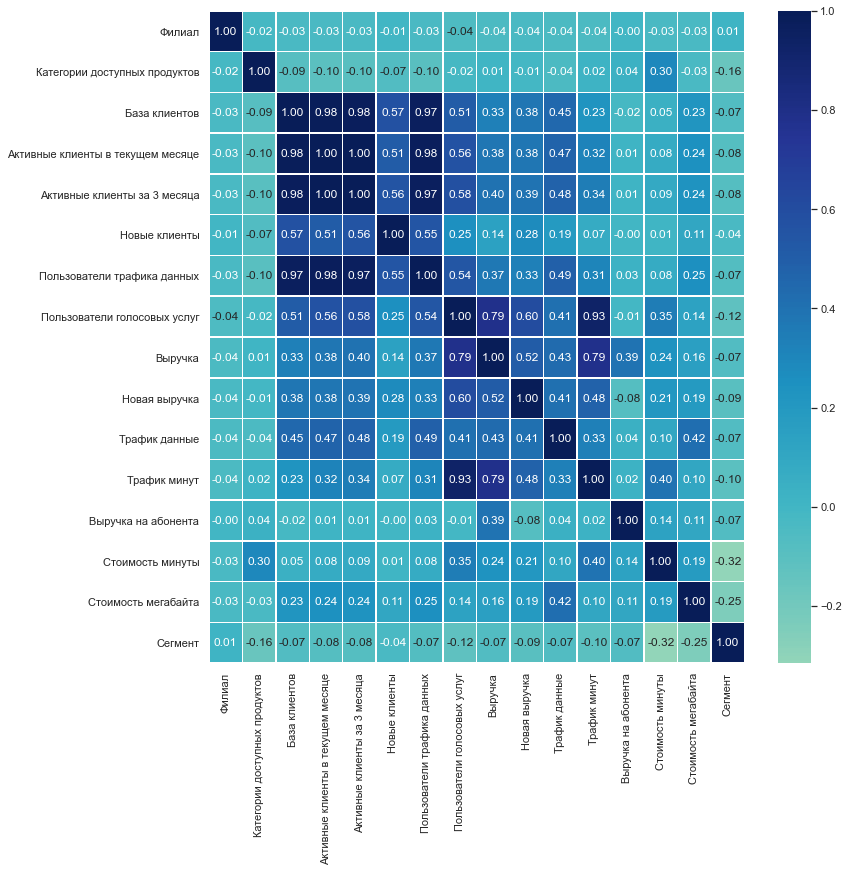

In [124]:
# посмотрим корелляцию переменных к целевой

correlations = df_old.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlations, center=0, annot=True, fmt='.2f', linewidths=.5, cmap="YlGnBu")

In [125]:
# сделаем дамми переменные для учета особенностей каждого

dummies_old = pd.get_dummies(df_old['Регион']) # для старых точек
df_old = pd.concat([dummies_old, df_old], axis=1)
del df_old['Регион']

dummies_new = pd.get_dummies(df_new['Регион']) # для новых точек
df_new = pd.concat([dummies_new, df_new], axis=1)
del df_new['Регион']

df_old

,PoО,АбО,АдО,АмО,АрО,АсО,БаО,БеО,БрО,ВлО,...,Пользователи трафика данных,Пользователи голосовых услуг,Выручка,Новая выручка,Трафик данные,Трафик минут,Выручка на абонента,Стоимость минуты,Стоимость мегабайта,Сегмент
0,1,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,1
1,0,0,0,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,1
2,0,0,0,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.03,0.02,1
3,0,0,0,1,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.02,1
4,0,0,0,1,0,0,0,0,0,0,...,0.00,0.01,0.00,0.03,0.00,0.01,0.34,0.05,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2994,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,2
2995,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.01,0.00,2
2996,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,2
2997,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.03,0.00,0.00,0.34,0.00,0.00,3


In [126]:
# подготовим данные для обучения моделей

X = df_old.iloc[:, :-1] # переменные для обучения
y = df_old['Сегмент'] # целевая переменная

In [127]:
# разделим на трейн и тест старые метки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=13)  
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2399, 73) (600, 73) (2399,) (600,)


In [128]:
# создадим словарь для сравнения моделей

classifiers = {
    "Logistic Regression": LogisticRegression(C = 0.0001),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(learning_rate=0.18, n_estimators=1000, random_state=13),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=13),
    "Neural Net": MLPClassifier(alpha = 1),
    "LightGBM": LGBMClassifier(random_state=13)
}

In [129]:
# функция для обучения нескольких моделей

def batch_classify(X_train, y_train, X_test, y_test, no_classifiers = 1, verbose = True):
    models = {}
    for classifier_name, classifier in list(classifiers.items())[:no_classifiers]:
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy_test_score = accuracy_score(y_test, y_pred)
        
        models[classifier_name] = {'model': classifier, 'accuracy test': accuracy_test_score}
    return models

def display_models(models, sort_by='accuracy test'):
    cls = [key for key in models.keys()]
    test_s = [models[key]['accuracy test'] for key in cls]
    
    df_ = pd.DataFrame(data=np.zeros(shape=(len(cls), 2)), columns = ['classifier', 'accuracy test'])
    for i in range(0, len(cls)):
        df_.loc[i, 'classifier'] = cls[i]
        df_.loc[i, 'accuracy test'] = test_s[i]
    
    display(df_.sort_values(by=sort_by, ascending=False))

In [130]:
models = batch_classify(X_train, y_train, X_test, y_test, no_classifiers = 8)
display_models(models)

,classifier,accuracy test
3,Gradient Boosting Classifier,0.89
7,LightGBM,0.87
5,Random Forest,0.86
4,Decision Tree,0.78
6,Neural Net,0.68
0,Logistic Regression,0.65
2,Linear SVM,0.65
1,Nearest Neighbors,0.56


In [142]:
# улучшим гиперпараметры наиболее эффективных подходов для LGBMC

LGBM_params = {
    'n_estimators': [80, 100, 500, 1000, 1500],
    'learning_rate': [0.7, 0.5, 0.2, 0.1, 0.05, 0.01],
    'num_leaves': [20, 30, 40, 50] # параметры для перебора
}

for n_est in LGBM_params['n_estimators']:
    for lr in LGBM_params['learning_rate']:
        for n_leaves in LGBM_params['num_leaves']:
            clf = LGBMClassifier(n_estimators=n_est, learning_rate = lr, num_leaves = n_leaves, random_state=13)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy_test_score = accuracy_score(y_test, y_pred)
            print("For ({}, {}, {}) - test score: \t {:.5f} ".format(n_est, lr, n_leaves, accuracy_test_score))

For (80, 0.7, 20) - test score: 	 0.88167 
For (80, 0.7, 30) - test score: 	 0.86667 
For (80, 0.7, 40) - test score: 	 0.88000 
For (80, 0.7, 50) - test score: 	 0.87333 
For (80, 0.5, 20) - test score: 	 0.87333 
For (80, 0.5, 30) - test score: 	 0.87333 
For (80, 0.5, 40) - test score: 	 0.88000 
For (80, 0.5, 50) - test score: 	 0.87500 
For (80, 0.2, 20) - test score: 	 0.87833 
For (80, 0.2, 30) - test score: 	 0.88667 
For (80, 0.2, 40) - test score: 	 0.87333 
For (80, 0.2, 50) - test score: 	 0.87333 
For (80, 0.1, 20) - test score: 	 0.87833 
For (80, 0.1, 30) - test score: 	 0.87667 
For (80, 0.1, 40) - test score: 	 0.87333 
For (80, 0.1, 50) - test score: 	 0.87833 
For (80, 0.05, 20) - test score: 	 0.87333 
For (80, 0.05, 30) - test score: 	 0.87833 
For (80, 0.05, 40) - test score: 	 0.87667 
For (80, 0.05, 50) - test score: 	 0.87500 
For (80, 0.01, 20) - test score: 	 0.83667 
For (80, 0.01, 30) - test score: 	 0.84000 
For (80, 0.01, 40) - test score: 	 0.82667 
For 

In [143]:
# улучшим гиперпараметры наиболее эффективных подходов для GBC

GBC_params = {
    'n_estimators': [80, 100, 500, 1000, 1500],
    'learning_rate': [0.7, 0.5, 0.2, 0.1, 0.05, 0.01],
    'min_samples_leaf': [2, 3, 4] # параметры для перебора
}

for n_est in GBC_params['n_estimators']:
    for lr in GBC_params['learning_rate']:
        for min_samp_leaf in GBC_params['min_samples_leaf']:
            clf = GradientBoostingClassifier(n_estimators=n_est, learning_rate = lr, min_samples_leaf = min_samp_leaf, random_state=13)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy_test_score = accuracy_score(y_test, y_pred)
            print("For ({}, {}, {}) - test score: \t {:.5f} ".format(n_est, lr, min_samp_leaf, accuracy_test_score))

For (80, 0.7, 2) - test score: 	 0.87500 
For (80, 0.7, 3) - test score: 	 0.87167 
For (80, 0.7, 4) - test score: 	 0.88333 
For (80, 0.5, 2) - test score: 	 0.87167 
For (80, 0.5, 3) - test score: 	 0.88000 
For (80, 0.5, 4) - test score: 	 0.87667 
For (80, 0.2, 2) - test score: 	 0.87500 
For (80, 0.2, 3) - test score: 	 0.88167 
For (80, 0.2, 4) - test score: 	 0.88167 
For (80, 0.1, 2) - test score: 	 0.86833 
For (80, 0.1, 3) - test score: 	 0.86333 
For (80, 0.1, 4) - test score: 	 0.86667 
For (80, 0.05, 2) - test score: 	 0.84000 
For (80, 0.05, 3) - test score: 	 0.84833 
For (80, 0.05, 4) - test score: 	 0.84667 
For (80, 0.01, 2) - test score: 	 0.82333 
For (80, 0.01, 3) - test score: 	 0.82333 
For (80, 0.01, 4) - test score: 	 0.82333 
For (100, 0.7, 2) - test score: 	 0.87000 
For (100, 0.7, 3) - test score: 	 0.87667 
For (100, 0.7, 4) - test score: 	 0.88000 
For (100, 0.5, 2) - test score: 	 0.88000 
For (100, 0.5, 3) - test score: 	 0.87667 
For (100, 0.5, 4) - tes

KeyboardInterrupt: 

In [144]:
# лучший вариант обучим и проведем кросс-валидацию

clf = LGBMClassifier(n_estimators=100, learning_rate = 0.1, num_leaves = 20, random_state=13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=3).mean()
print("Cross val score: \t {:.5f}".format(scores))

Cross val score: 	 0.85286


In [145]:
# лучший вариант обучим и проведем кросс-валидацию

clf = GradientBoostingClassifier(n_estimators=500, learning_rate = 0.5, min_samples_leaf = 2, random_state=13)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
scores = cross_val_score(clf, X_train, y_train, cv=3).mean()
print("Cross val score: \t {:.5f}".format(scores))

Cross val score: 	 0.85036


In [146]:
# посмотрим матрицу ошибок и отчет

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[367  21   1]
 [ 29 158   4]
 [  0   8  12]]
              precision    recall  f1-score   support

           1       0.93      0.94      0.94       389
           2       0.84      0.83      0.84       191
           3       0.71      0.60      0.65        20

    accuracy                           0.90       600
   macro avg       0.83      0.79      0.81       600
weighted avg       0.89      0.90      0.89       600



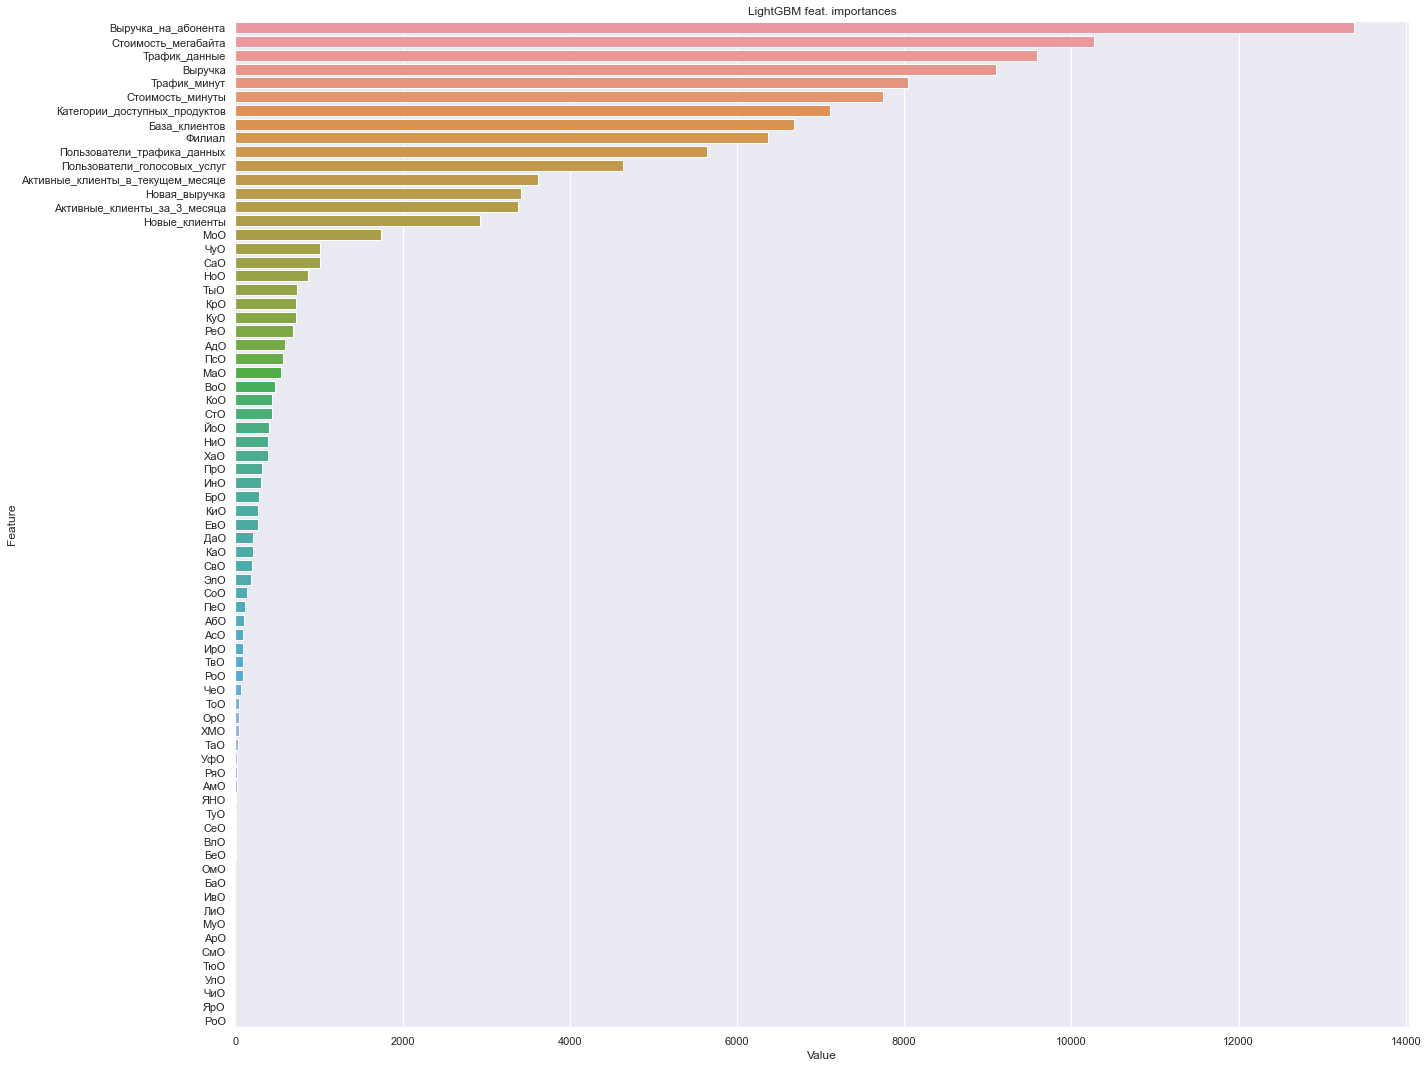

In [134]:
# посмотрим вес предикторов - возможно часть лишние

feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_, clf.feature_name_)), columns=['Value', 'Feature'])

plt.figure(figsize=(20, 15))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM feat. importances')
plt.tight_layout()
plt.show()

In [135]:
# оставим самые важные 5 предикторов

feature_imp.sort_values('Value', ascending=False)[:16]['Feature'].values

array(['Выручка_на_абонента', 'Стоимость_мегабайта', 'Трафик_данные',
       'Выручка', 'Трафик_минут', 'Стоимость_минуты',
       'Категории_доступных_продуктов', 'База_клиентов', 'Филиал',
       'Пользователи_трафика_данных', 'Пользователи_голосовых_услуг',
       'Активные_клиенты_в_текущем_месяце', 'Новая_выручка',
       'Активные_клиенты_за_3_месяца', 'Новые_клиенты', 'МоО'],
      dtype=object)

[['Выручка на абонента', 'Стоимость мегабайта', 'Выручка', 'Трафик данные', 'Стоимость минуты']]

y_test.unique()

In [ ]:
SVC_model = SVC()  
# В KNN-модели нужно указать параметр n_neighbors
# Это число точек, на которое будет смотреть 
# классификатор, чтобы определить, к какому классу принадлежит новая точка
KNN_model = KNeighborsClassifier(n_neighbors=30) 

In [ ]:
SVC_model.fit(X_train, y_train) 
KNN_model.fit(X_train, y_train)

In [ ]:
SVC_prediction = SVC_model.predict(X_test) 
KNN_prediction = KNN_model.predict(X_test)

In [ ]:
# Оценка точности — простейший вариант оценки работы классификатора
print(accuracy_score(y_test, SVC_prediction))  
print(accuracy_score(y_test, KNN_prediction))  
# Но матрица неточности и отчёт о классификации дадут больше информации о производительности
print(confusion_matrix(SVC_prediction, y_test))  
print(classification_report(KNN_prediction, y_test))

In [ ]:
df.groupby(['FILIAL_NAME'])['Сумма по полю Выручка'].sum().to_frame().sort_values(by='Сумма по полю Выручка', ascending=False).hist()

In [ ]:
df.groupby(['Период'])['Сумма по полю Новые клиенты'].count().sort_values()

In [ ]:
df['Регион'].unique()

In [ ]:
df.columns

In [ ]:
df[df['Регион'] != 'МоО'].groupby(['FILIAL_NAME', 'Регион'])['SUBSEGMENT_NAME', 'Категории продуктов', 'Сумма по полю База клиентов',
       'Сумма по полю Активные клиенты в текущем месяце',
       'Сумма по полю Активные клиенты за 3 посл месяца',
       'Сумма по полю Новые клиенты',
       'Сумма по полю Пользователи трафика данных',
       'Сумма по полю Пользователи голосовых услуг', 'Сумма по полю Выручка',
       'Сумма по полю Новая выручка', 'Сумма по полю Трафик, данные',
       'Сумма по полю Трафик, минут', 'Сумма по полю Выручка на абонента',
       'Стоимость минуты', 'Стоимость мегабайта'].sum().sort_values(by='Сумма по полю Выручка', ascending=False)

In [ ]:
df_groups = df[df['Регион'] != 'МоО'].groupby(['FILIAL_NAME', 'Регион'])['SUBSEGMENT_NAME', 'Категории продуктов', 'Сумма по полю База клиентов',
       'Сумма по полю Активные клиенты в текущем месяце',
       'Сумма по полю Активные клиенты за 3 посл месяца',
       'Сумма по полю Новые клиенты',
       'Сумма по полю Пользователи трафика данных',
       'Сумма по полю Пользователи голосовых услуг', 'Сумма по полю Выручка',
       'Сумма по полю Новая выручка', 'Сумма по полю Трафик, данные',
       'Сумма по полю Трафик, минут', 'Сумма по полю Выручка на абонента',
       'Стоимость минуты', 'Стоимость мегабайта'].sum().sort_values(by='Сумма по полю Выручка', ascending=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

df_groups_scale = np.nan_to_num(df_groups) 
df_groups_scale = StandardScaler().fit_transform(df_groups_scale)

In [ ]:
df_groups_scale

In [ ]:
distortions = []
mapping = {}
K = range(1,10) # вариация в 10 кластеров 

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_groups_scale)
    kmeanModel.fit(df_groups_scale)    
    distortions.append(sum(np.min(cdist(df_groups_scale, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_groups_scale.shape[0])
   
    mapping[k] = sum(np.min(cdist(df_groups_scale, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df_groups_scale.shape[0]
    
for key,val in mapping.items():
    print(str(key)+' : '+str(val))
        

plt.plot(K, distortions, 'bx-')
plt.xlabel('values of clusters')
plt.ylabel('distortion')
plt.show()

In [ ]:
cluster_num = 3
k_means = KMeans(init = 'k-means++', n_clusters = cluster_num, n_init = 20, random_state = 42)
k_means.fit(df_groups_scale)
labels = k_means.labels_
df_groups['cluster'] = labels

In [ ]:
df_groups.groupby(['cluster']).count()

In [ ]:
df_groups.groupby(['cluster']).mean()

In [ ]:
df_groups[df_groups['cluster']==1]